<a href="https://colab.research.google.com/github/Divyansh-Bari/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [ ]:
#Load the data from csv file to pandas dataframe
titanic_data = pd.read_csv('tested.csv')

In [ ]:
#printing the first five rows of the dataframe
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Number of rows and columns
titanic_data.shape

(418, 12)

In [ ]:
# Getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# Check the number of miisng values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Drop the 'Cabin' column from the dataframe
titanic_data= titanic_data.drop(columns='Cabin', axis=1)

# Replacing the missing values in 'Age' column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Replacing the missing value in 'Fare' column with the mean value
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [ ]:
# Check the missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Finding the number of people survived and did not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

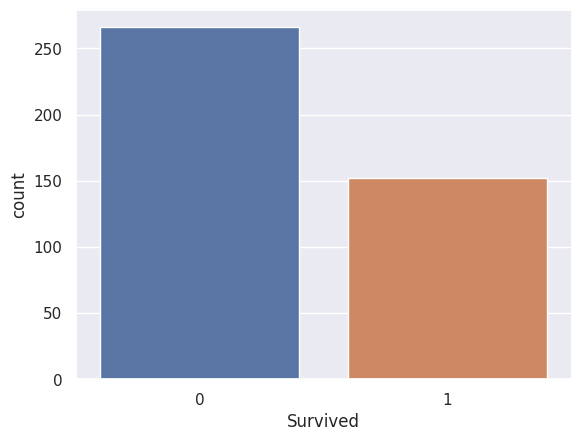

In [ ]:
sns.set()

# Making a countplot for "Survived" column
sns.countplot(x='Survived',data= titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

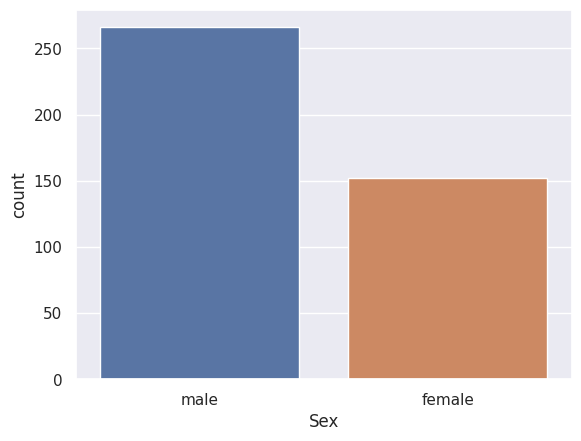

In [ ]:
sns.countplot(x='Sex', data= titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

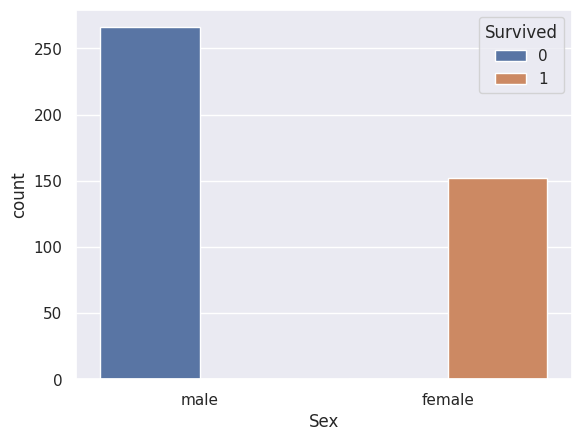

In [ ]:
sns.countplot(x='Sex', hue='Survived', data= titanic_data)

In [ ]:
# It is clearly visible that females are survived
titanic_data[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,0,male
3,0,male
4,1,female
...,...,...
413,0,male
414,1,female
415,0,male
416,0,male


In [ ]:
titanic_data [['Survived', 'Pclass']]

,Survived,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


<Axes: xlabel='Pclass', ylabel='count'>

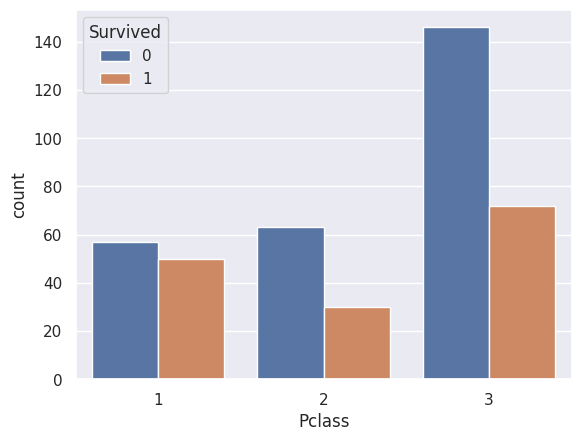

In [ ]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_data)

In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0, 'C':1, 'Q' :2}}, inplace = True)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [ ]:
x_old= titanic_data.drop(columns = 'Survived' , axis = 1)
x_new= x_old.drop(columns = 'Name' , axis = 1)
x= x_new.drop(columns = 'Ticket' , axis = 1)
y= titanic_data['Survived']

In [ ]:
print(x)
print(y)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    0  34.50000      0      0    7.8292         2
1            893       3    1  47.00000      1      0    7.0000         0
2            894       2    0  62.00000      0      0    9.6875         2
3            895       3    0  27.00000      0      0    8.6625         0
4            896       3    1  22.00000      1      1   12.2875         0
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    0  30.27259      0      0    8.0500         0
414         1306       1    1  39.00000      0      0  108.9000         1
415         1307       3    0  38.50000      0      0    7.2500         0
416         1308       3    0  30.27259      0      0    8.0500         0
417         1309       3    0  30.27259      1      1   22.3583         1

[418 rows x 8 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [ ]:
print(x_train)

[[-0.80590963  0.91867967 -0.79385662 ... -0.47506404 -0.39766881
   0.76265912]
 [-0.69000888  0.91867967 -0.79385662 ... -0.47506404 -0.50696891
  -0.71087363]
 [-0.79763101  0.91867967 -0.79385662 ... -0.47506404 -0.53448935
   0.76265912]
 ...
 [-0.65689438  0.91867967 -0.79385662 ... -0.47506404 -0.53448935
   0.76265912]
 [ 1.5203841   0.91867967 -0.79385662 ... -0.47506404 -0.52062246
   2.23619187]
 [ 0.27031167 -1.42864062 -0.79385662 ... -0.47506404  0.24077641
  -0.71087363]]


In [ ]:
# Train the model using Logistic regression that uses binary classification
model = LogisticRegression()
# trained the model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy score of the test data is :' ,testing_data_accuracy)

Accuracy score of the test data is : 0.7047619047619048


In [ ]:
x_train_prediction = model.predict(x_train)
print(x_train_prediction)

[0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0]


In [ ]:
# Recall score
test_data_recall = recall_score(y_train, x_train_prediction)

In [ ]:
print('test data recall is :' , test_data_recall)

test data recall is : 1.0


In [ ]:
score = model.score(x_test,y_test)
print(score)

0.7047619047619048


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
cm = metrics.confusion_matrix(y_train,x_train_prediction)
print(cm)

[[192   0]
 [  0 121]]


Text(0.5, 1.0, "('Accuracy Score :', 0.7047619047619048)")

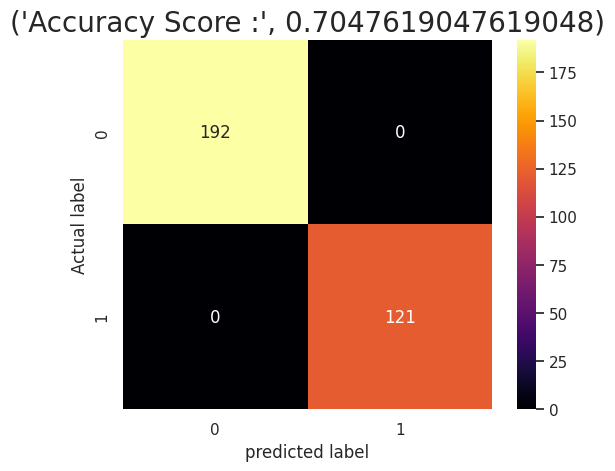

In [ ]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap = "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 20)